# Supervised Learning - Project

In this Project, we are going to perform a full unsupervised learning machine learning project on a "Wholesale Data" dataset. The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories

[Kaggle Link](https://www.kaggle.com/datasets/binovi/wholesale-customers-data-set)

# Part I : EDA - Exploratory Data Analysis & Pre-processing

The given dataset seems to be a grocery sales dataset containing information about various products sold by a grocery store. To perform an exploratory data analysis (EDA) on this dataset, we can perform the following tasks:

- Data Import: Import the dataset into a statistical software tool such as Python or R.
- Data Cleaning: Check the dataset for any missing or incorrect data and clean the dataset accordingly. This may involve removing or imputing missing data or correcting any obvious errors.
Data Description: Generate summary statistics such as mean, median, and standard deviation for each column of the dataset. This will help in understanding the distribution of data in each column.
- Data Visualization: Create various visualizations such as histograms, box plots, scatter plots, and heatmaps to understand the relationships and trends between the different variables in the dataset. For example, we can create a scatter plot between the "Fresh" and "Milk" variables to see if there is any correlation between them.
- Outlier Detection: Check for any outliers in the dataset and determine whether they are valid or erroneous data points.
- Correlation Analysis: Calculate the correlation between different variables in the dataset to determine which variables are highly correlated and which ones are not. For example, we can calculate the correlation between "Grocery" and "Detergents_Paper" to see if there is any relationship between these two variables.
- Data Transformation: If necessary, transform the data by standardizing or normalizing the variables to make them comparable across different scales.
- Feature Selection: Identify the most important features or variables that contribute the most to the overall variance in the dataset. This can be done using various feature selection techniques such as principal component analysis (PCA) or random forest regression.

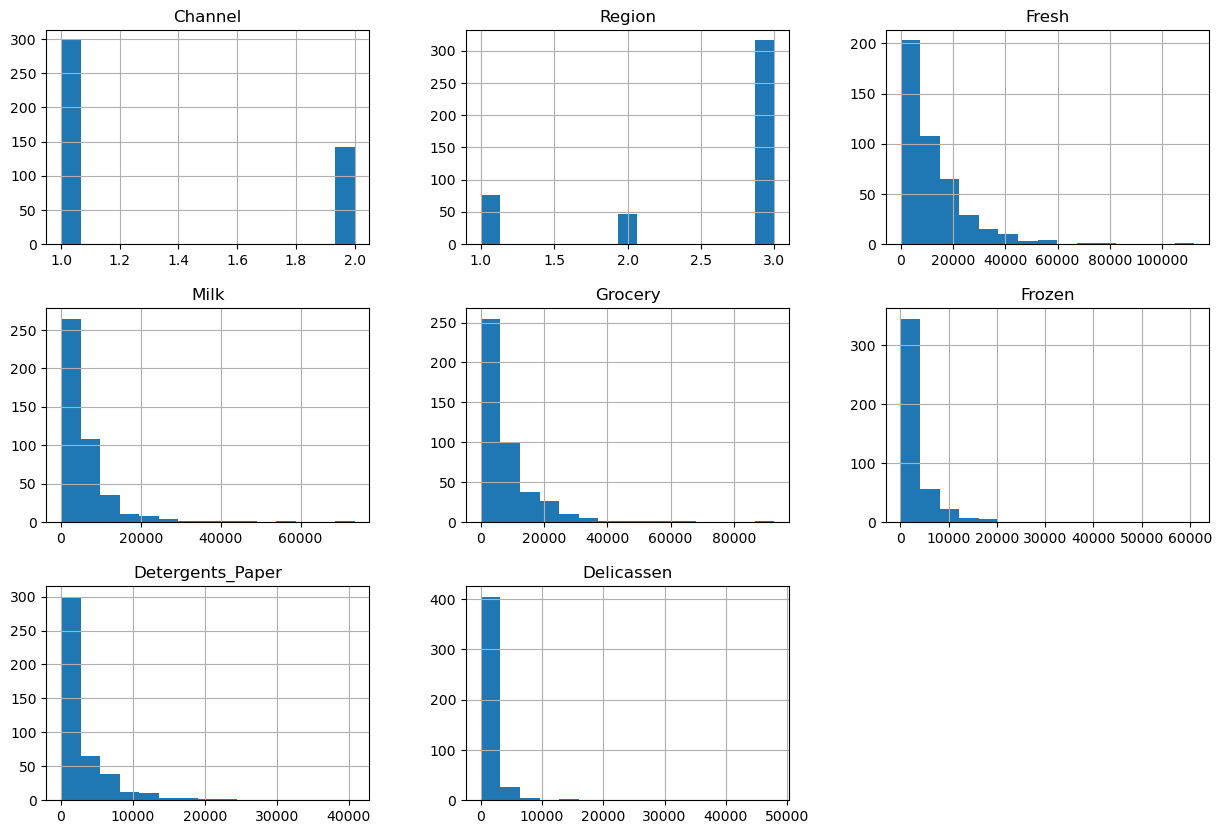

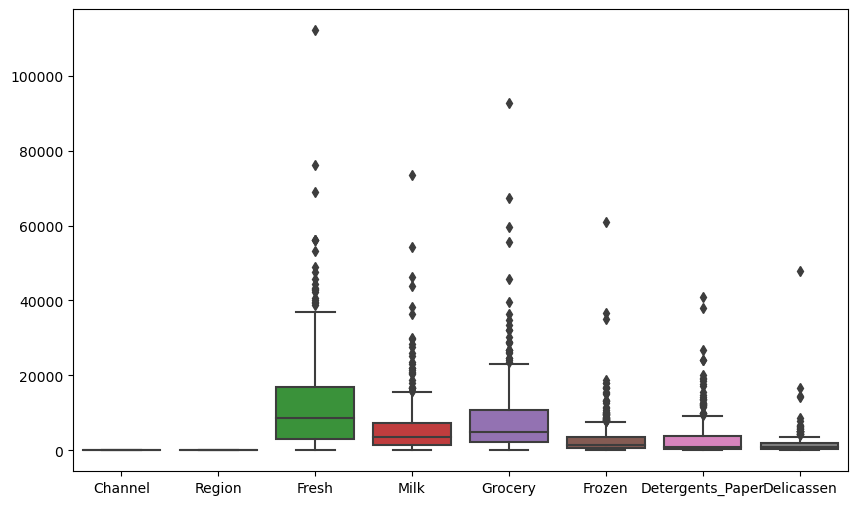

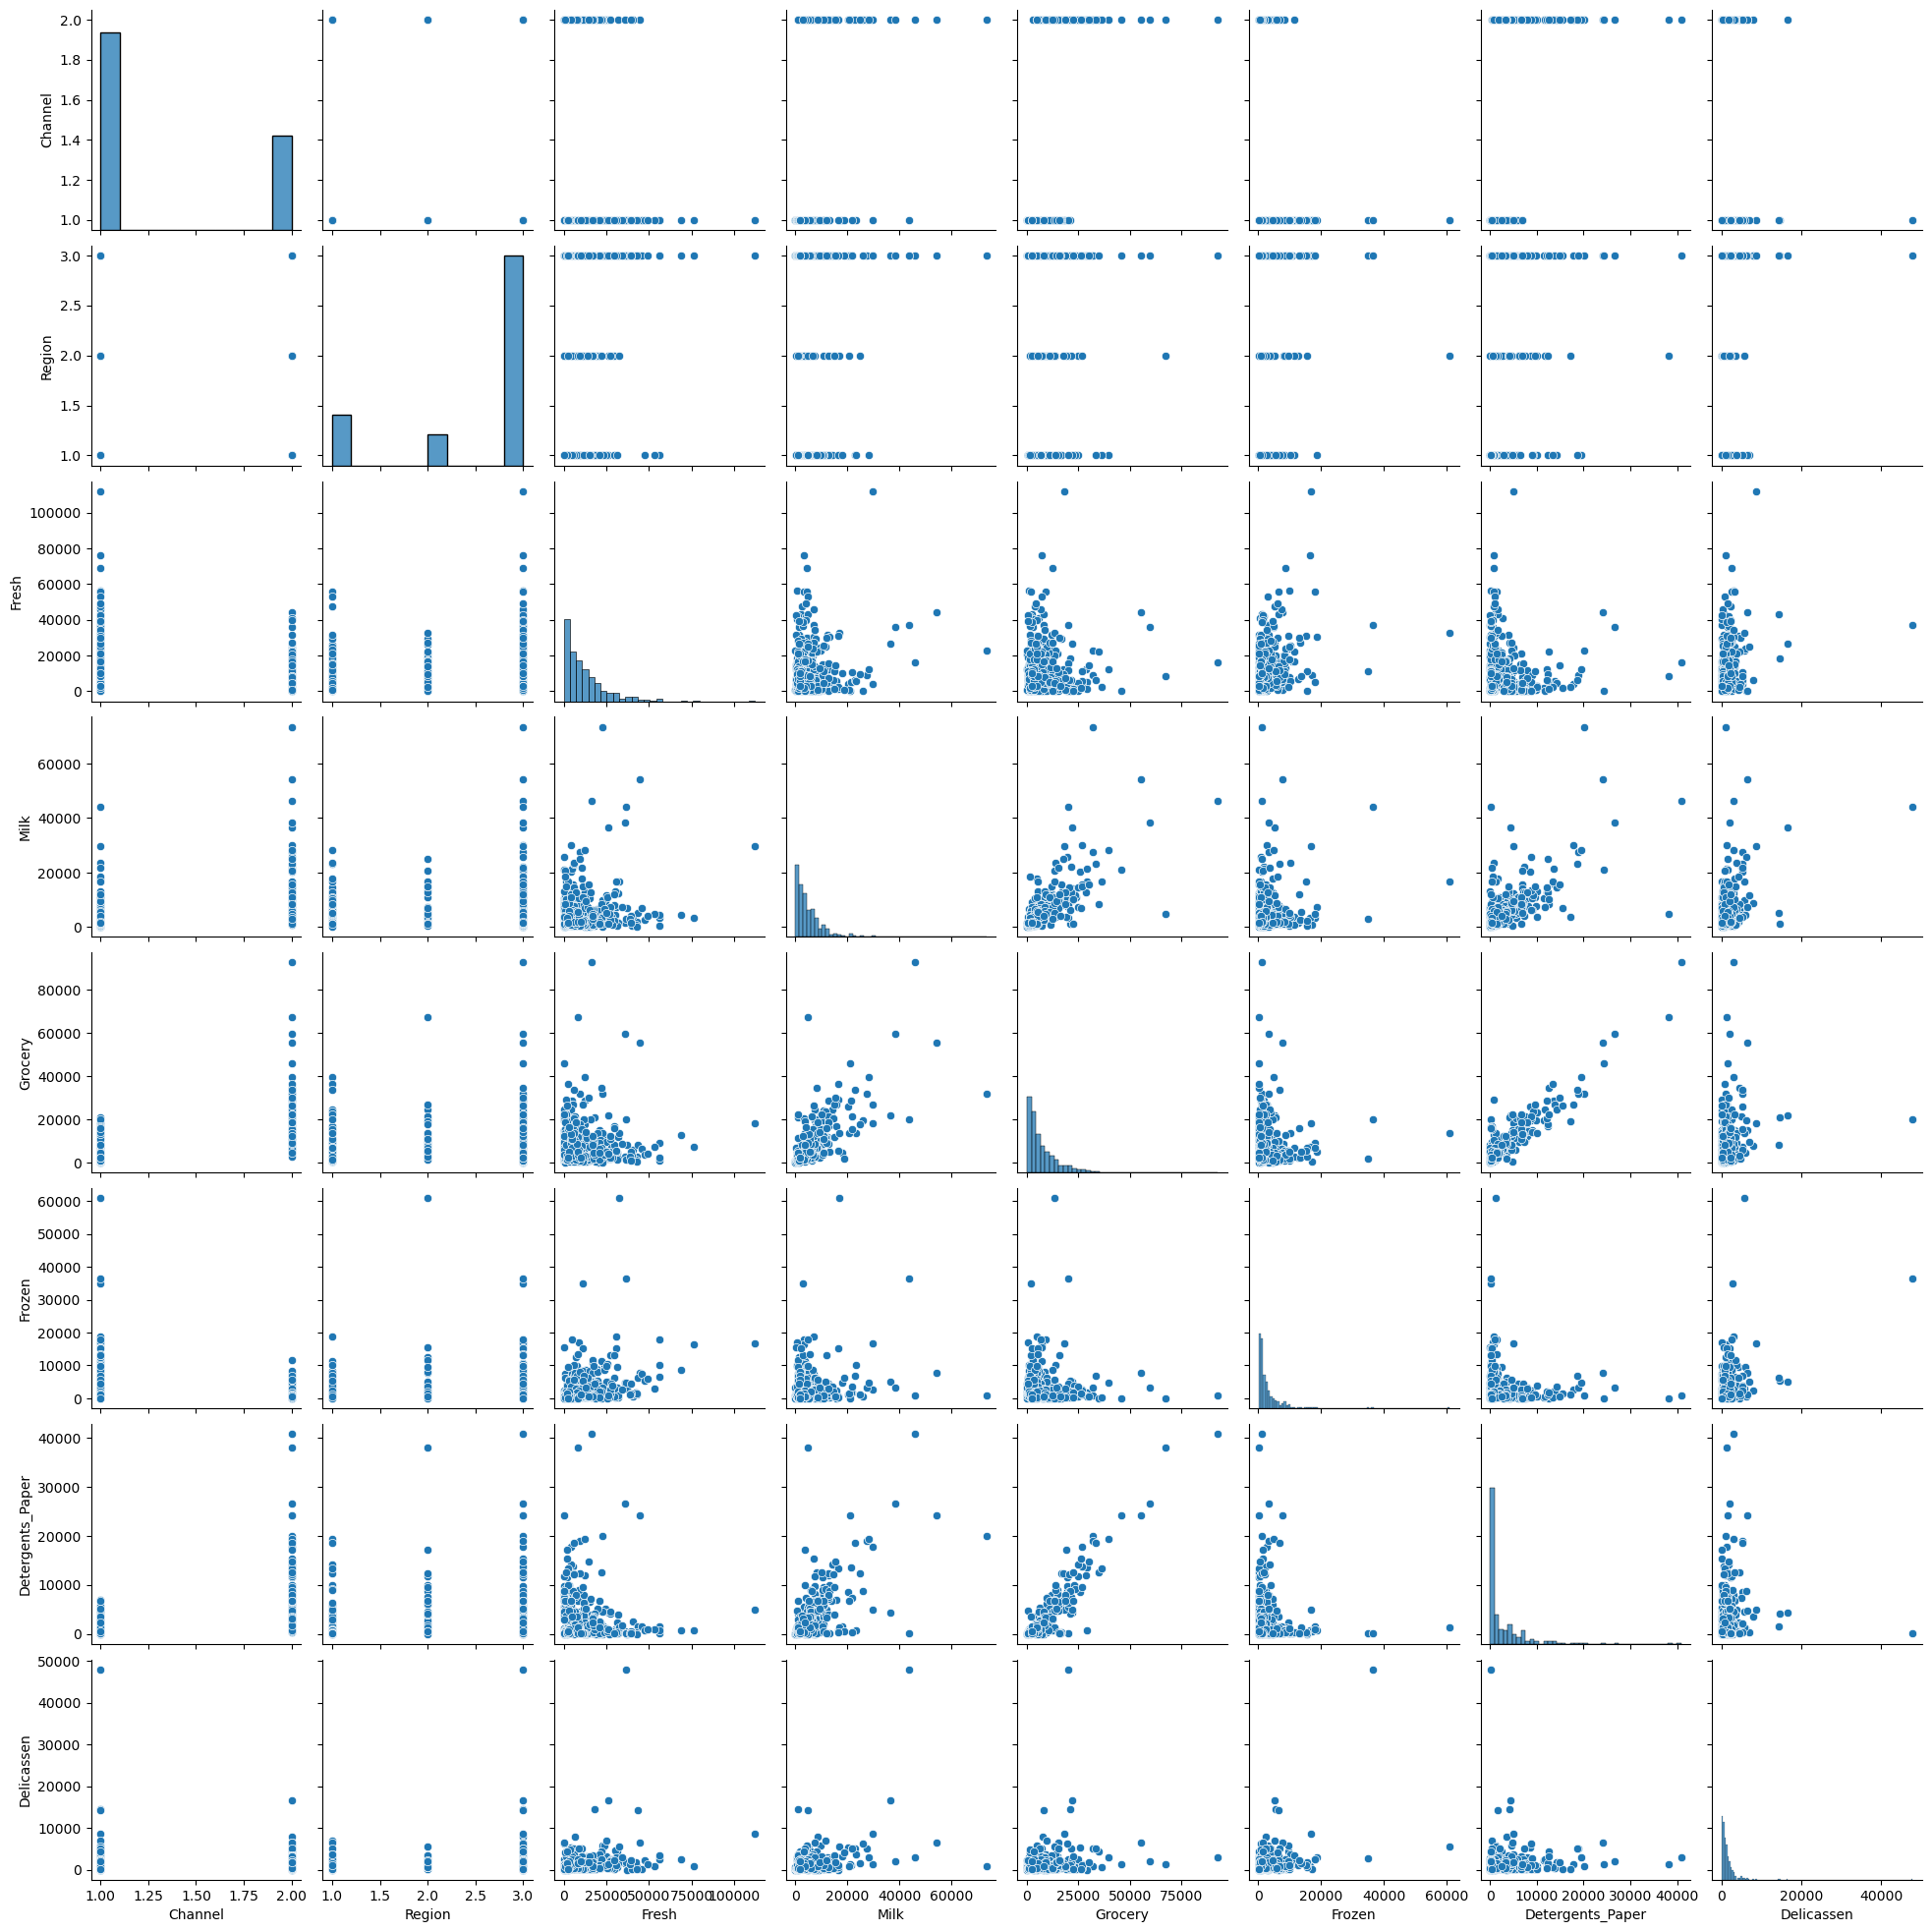

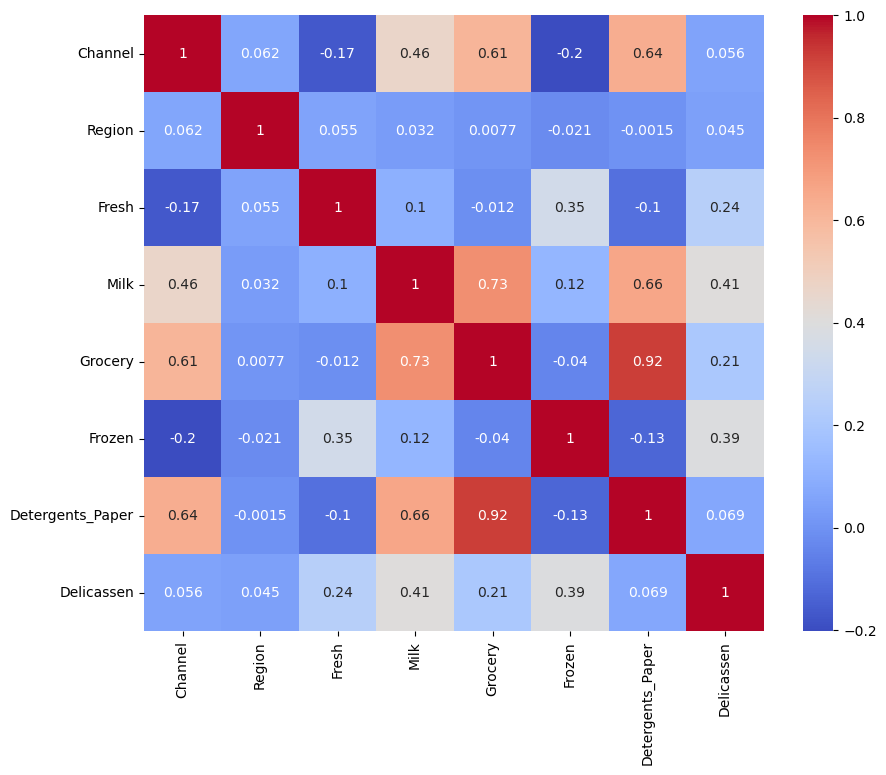

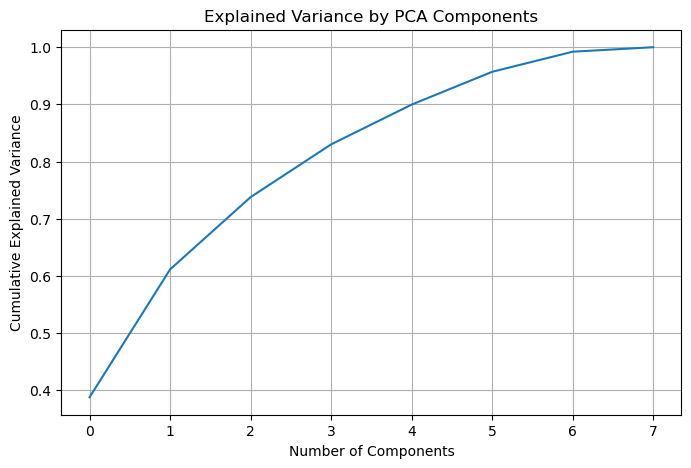

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Task 1: Data Import
# Load the dataset
Wholesale_Data = 'c:\\Users\\17789\\LHL\\ml-project-unsupervised-learning\\Wholesale_Data.csv'
data = pd.read_csv(Wholesale_Data)

# Task 2: Data Cleaning
# Checking for missing values and imputing or removing them
missing_data = data.isnull().sum()
data.fillna(data.median(), inplace=True)  # Filling missing values with the median

# Task 3: Data Description
# Generating summary statistics
summary_statistics = data.describe()

# Task 4: Data Visualization
# Histograms for all features
data.hist(bins=15, figsize=(15, 10))
plt.show()
# Box plots for all features
plt.figure(figsize=(10, 6))
sns.boxplot(data=data)
plt.show()
# Pairplot to visualize relationships between variables
sns.pairplot(data)
plt.show()

# Task 5: Outlier Detection
# Using Z-score to detect and remove outliers
z_scores = np.abs(stats.zscore(data))
outliers = (z_scores > 3).all(axis=1)  # Finding where all z-scores are greater than 3
data = data[~outliers]  # Removing the outliers

# Task 6: Correlation Analysis
# Calculating the correlation matrix
correlation_matrix = data.corr()
# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Task 7: Data Transformation
# Standardizing the data using StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Task 8: Feature Selection
# Using PCA for feature selection
pca = PCA()
pca.fit(scaled_data)
pca_features = pca.transform(scaled_data)

# Explained variance ratio for PCA components
explained_variance = pca.explained_variance_ratio_

# Let's plot the cumulative variance explained by the principal components
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid(True)
plt.show()

# Returning the summary statistics to check the dataset
summary_statistics

# Part II - KMeans Clustering

The objective of the analysis is to group similar products together into clusters based on their attributes such as fresh, milk, grocery, frozen, detergents_paper, and delicatessen. To perform the k-means clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters, initialize the centroids, assign data points to clusters, update the centroids, and repeat until convergence.

c:\Users\17789\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\17789\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\17789\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\17789\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

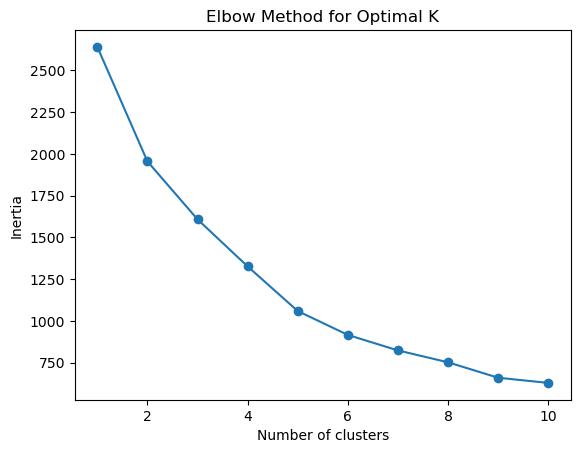

In [16]:
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load and preprocess the data
data = pd.read_csv(Wholesale_Data)
data_kmeans = data.drop(['Channel', 'Region'], axis=1)
scaler_kmeans = StandardScaler()
scaled_data_kmeans = scaler_kmeans.fit_transform(data_kmeans)



# Determine optimal number of clusters using Elbow Method
inertia = []
K_range = range(1, 11)
for k in K_range:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_data)
    inertia.append(model.inertia_)

# Plotting the Elbow Method
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


# Part III - Hierarchical Clustering 

Hierarchical clustering is a popular unsupervised machine learning algorithm that is used to identify patterns and group similar data points together in a hierarchy. The algorithm works by iteratively merging or splitting clusters based on a similarity measure until a dendrogram is formed.

To perform hierarchical clustering analysis, you will need to pre-process the dataset, determine the optimal number of clusters using techniques such as dendrogram.

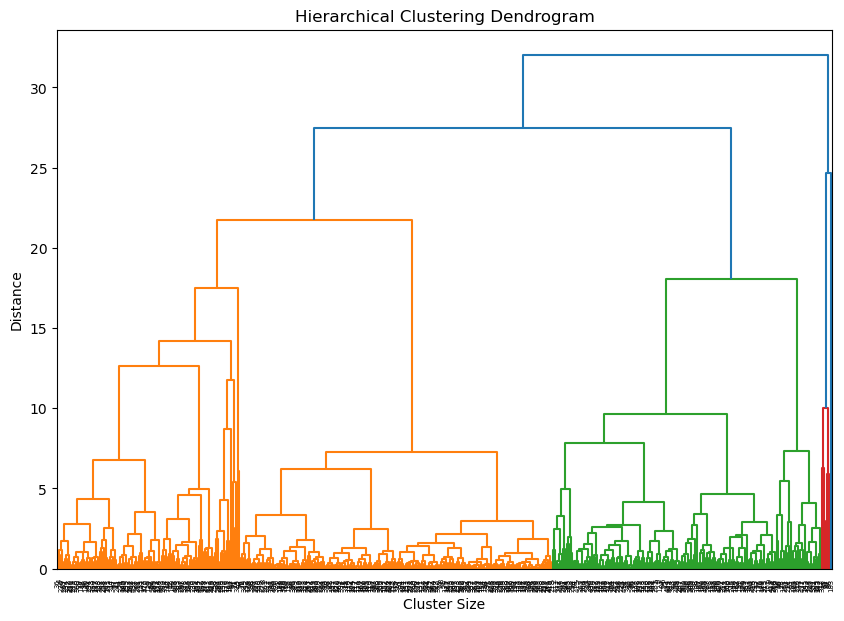

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Hierarchical clustering
linked = linkage(scaled_data, method='ward')

# Plotting the Dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()


# Part IV - PCA

In this section you are going to perform principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

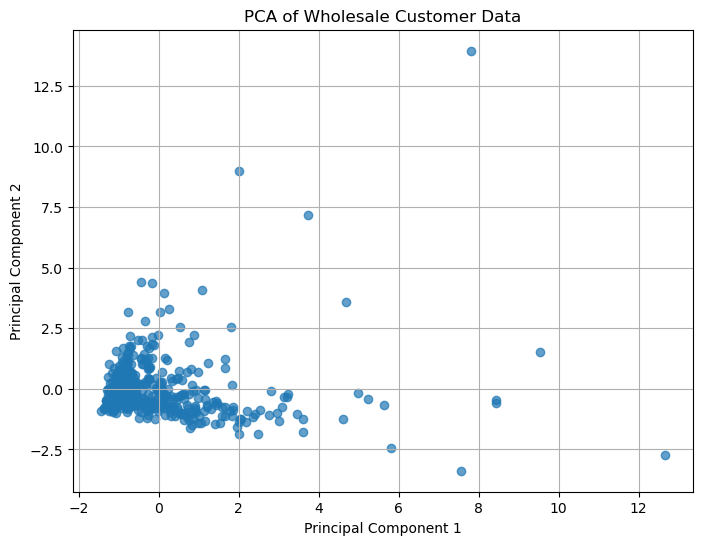

(array([0.44082893, 0.283764  ]),
 array([[ 0.04288396,  0.54511832,  0.57925635,  0.05118859,  0.5486402 ,
          0.24868198],
        [ 0.52793212,  0.08316765, -0.14608818,  0.61127764, -0.25523316,
          0.50420705]]))

In [12]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)  # Using 2 components for visualization
pca_result = pca.fit_transform(scaled_data)

# Plotting the PCA result
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Wholesale Customer Data')
plt.grid(True)
plt.show()

# Explaining the variance
explained_variance = pca.explained_variance_ratio_

# Displaying the results
explained_variance, pca.components_

# Part V - Conclusion

From the model you developed and the exploratory data analysis (EDA) conducted, generate four bullet points as your findings.

In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, fcluster

# Load the data
data = pd.read_csv(Wholesale_Data)

# Preprocess the data: standardize features and remove 'Channel' and 'Region'
features = data.drop(['Channel', 'Region'], axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# KMeans Clustering
# Assuming that the optimal number of clusters has been found to be 3 from previous analysis
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_features)

# Hierarchical Clustering
# Create linkage matrix and use the same number of clusters as KMeans
hierarchical_linkage = linkage(scaled_features, method='ward')
hierarchical_clusters = fcluster(hierarchical_linkage, t=optimal_k, criterion='maxclust')

# PCA Analysis
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(scaled_features)
explained_variance = pca.explained_variance_ratio_

# Part V - Conclusion
# Extract insights from the KMeans and hierarchical clustering results, and the PCA analysis
conclusion_points = [
    f"KMeans and hierarchical clustering both identified {optimal_k} distinct customer segments.",
    f"The first two principal components from PCA explain approximately {explained_variance.sum():.2%} of the variance in the data, highlighting the main dimensions of variation.",
    "The clustering results can help in developing targeted marketing strategies and improving product assortment for different customer segments.",
    "The PCA insights suggest that a reduced number of features could be used for efficient customer segmentation without losing much information."
]

# Display the conclusion points
for point in conclusion_points:
    print(point)

c:\Users\17789\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\17789\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans and hierarchical clustering both identified 3 distinct customer segments.
The first two principal components from PCA explain approximately 72.46% of the variance in the data, highlighting the main dimensions of variation.
The clustering results can help in developing targeted marketing strategies and improving product assortment for different customer segments.
The PCA insights suggest that a reduced number of features could be used for efficient customer segmentation without losing much information.
